In [1]:
import json

cate = ['Mexican', 'Fast Food', 'Pizza', 'American (Traditional)', 'Sandwiches', 
        'Breakfast & Brunch', 'Chinese', 'Italian']

fullcate = []
file = open("./business.json",'r')
content = []
for line in file:
    content.append(json.loads(line))

for item in content:
    if(item["city"] == "Las Vegas"):
        if((item['categories'] not in fullcate)&('Restaurants' in item['categories'])):
            fullcate.append(item['categories'])
#         if any(j in cate for j in item['categories']):
#             data.append(item)
# print(data[0])
# print(len(data))
print(len(fullcate))


3598


In [2]:
uniquecate = []
for i in range(len(fullcate)):
    for item in fullcate[i]:
        if item not in uniquecate:
            uniquecate.append(item)
print(len(uniquecate))
print(uniquecate)
#['Mexican', 'Fast Food', 'Pizza','American (Traditional)', 
#'Sandwiches', 'Breakfast & Brunch', 'Chinese', 'Italian'
#'Cafes', 'Sandwiches', 'Sandwiches', 'Bars',
#'Chicken Wings', 'Hot Dogs', 'Burgers', 'Seafood'
#'Jazz & Blues','Korean', 'Donuts', 'Hot Pot']

390
['Nightlife', 'Bars', 'Barbeque', 'Sports Bars', 'American (New)', 'Restaurants', 'Fast Food', 'Sandwiches', 'Arcades', 'Arts & Entertainment', 'Gastropubs', 'Italian', 'Burgers', 'Cafes', 'Wine Bars', 'American (Traditional)', 'Seafood', 'Pizza', 'Karaoke', 'Mexican', 'Dance Clubs', 'Thai', 'Food', 'Coffee & Tea', 'Salad', 'Breakfast & Brunch', 'Chinese', 'Specialty Food', 'Candy Stores', 'Ice Cream & Frozen Yogurt', 'Pubs', 'Irish', 'Japanese', 'Delis', 'Shaved Ice', 'Hot Dogs', 'Creperies', 'Buffets', 'Event Planning & Services', 'Caterers', 'Greek', 'Middle Eastern', 'Mediterranean', 'Breweries', 'Hawaiian', 'Asian Fusion', 'Korean', 'Casinos', 'Chicken Shop', 'Chicken Wings', 'Diners', 'Desserts', 'Sushi Bars', 'Lounges', 'Cuban', 'Food Trucks', 'Music Venues', 'Persian/Iranian', 'Cocktail Bars', 'Steakhouses', 'Filipino', 'Tex-Mex', 'Beer Bar', 'Bakeries', 'Tapas Bars', 'Donuts', 'Soup', 'Street Vendors', 'Poke', 'Irish Pub', 'Vietnamese', 'Do-It-Yourself Food', 'Hot Pot', 'F

In [3]:
data = []
for item in content:
    if(item["city"] == "Las Vegas"):
        if any(label in uniquecate for label in item['categories'])&('Restaurants' in item['categories']):
            data.append(item)
print("there are", len(data), "restaurants in Las Vegas.")
print(data[0])

there are 5899 restaurants in Las Vegas.
{'business_id': 'Pd52CjgyEU3Rb8co6QfTPw', 'name': 'Flight Deck Bar & Grill', 'neighborhood': 'Southeast', 'address': '6730 S Las Vegas Blvd', 'city': 'Las Vegas', 'state': 'NV', 'postal_code': '89119', 'latitude': 36.0669136, 'longitude': -115.1708484, 'stars': 4.0, 'review_count': 13, 'is_open': 1, 'attributes': {'Alcohol': 'full_bar', 'HasTV': True, 'NoiseLevel': 'average', 'RestaurantsAttire': 'casual', 'BusinessAcceptsCreditCards': True, 'Music': {'dj': False, 'background_music': True, 'no_music': False, 'karaoke': False, 'live': False, 'video': False, 'jukebox': False}, 'Ambience': {'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}, 'RestaurantsGoodForGroups': True, 'Caters': True, 'WiFi': 'free', 'RestaurantsReservations': False, 'RestaurantsTableService': True, 'RestaurantsTakeOut': True, 'GoodForKids': True, 'HappyHour': True, 'Go

In [4]:
ll = []
for row in data:
    temp = []
    temp.append(row['latitude'])
    temp.append(row['longitude'])
    ll.append(temp)
print(ll[0])

[36.0669136, -115.1708484]


## K-means++

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import seaborn as sns
%matplotlib inline

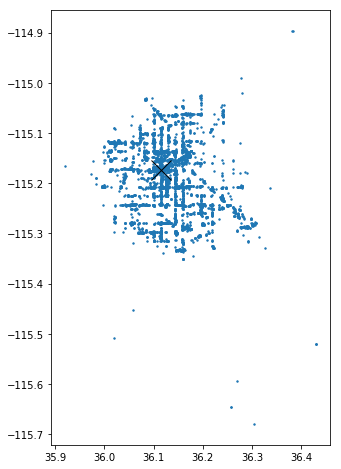

In [6]:
X = np.asarray(ll)
plt.figure(figsize = (5,8))
_ = plt.scatter(X[:,0],X[:,1],s = 2)
plt.plot([36.114647], [-115.172813], marker="x", markersize=20, color="black", label="downtown")

In [7]:
from sklearn.cluster import KMeans
k=8
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
labels = kmeans.fit_predict(X)
print(len(labels))

5899


Text(0,0.5,'longitude')

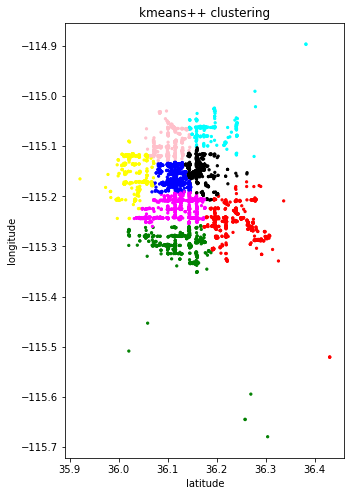

In [8]:
colors = [['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink'][p] for p in labels]
plt.figure(figsize = (5, 8))
plt.scatter(X[:, 0], X[:, 1], color = colors, s = 5)
plt.title('kmeans++ clustering')
plt.xlabel('latitude')
plt.ylabel('longitude')

In [9]:
average_rate = {}
colorname = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink']
for c in range(8):
    rate_sum = 0
    rest_count = 0
    for i in range(len(labels)):
        if(labels[i]==c):
            rate_sum = rate_sum + data[i]['stars']
            rest_count +=1
            average_rate[colorname[c]] = rate_sum/rest_count
            
print(average_rate)

{'blue': 3.331048663468129, 'green': 3.558270676691729, 'red': 3.3466076696165192, 'cyan': 3.185589519650655, 'magenta': 3.5991379310344827, 'yellow': 3.4588122605363987, 'black': 3.560725552050473, 'pink': 3.4916467780429596}


178


Text(36.1146,-115.183,'downtown')

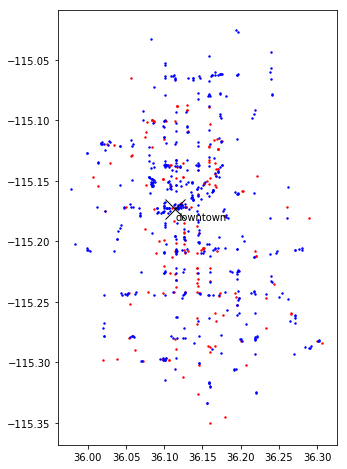

In [10]:
best = []
bestll = []
worst = []
worstll = []

for item in data:
    temp = []
    if(item['stars']>=4.9):
        best.append(item)
        temp.append(item['latitude'])
        temp.append(item['longitude'])
        bestll.append(temp)
        

for item in data:
    temp = []
    if(item['stars']<=2.0):
        worst.append(item)
        temp.append(item['latitude'])
        temp.append(item['longitude'])
        worstll.append(temp)


print(len(bestll))
X = np.asarray(bestll)
Y = np.asarray(worstll)
plt.figure(figsize = (5,8))
_ = plt.scatter(X[:,0], X[:,1], color = 'r', s = 2)
_ = plt.scatter(Y[:,0], Y[:,1], color = 'b', s = 2)

plt.plot([36.114647], [-115.172813], marker="x", markersize=20, color="black", label = "downtown")
plt.text(36.114647, -115.182813,r'downtown')

In [11]:
rev = open("./review.json",'r')
cont = []
for line in rev:
    cont.append(json.loads(line))